# Analyse données sur directeurs de thèse aux concours doctoraux

### Récupérer les données de l'onglet CD du fichier "C:\Users\GODLEWSKI\Seafile\Ma bibliothèque\EDAC\Données chiffrées\Stata\EDAC_Data_Stata.xlsx" et copier coller dans un fichier Classeur1.xlsx et mettre dans Téléchargements

Import données

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/GODLEWSKI/Downloads/Classeur1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Nom,Prenom,Directeur,Labo,Annee,Admis
0,LEMAIRE POUGET,Célia,Nobre,HUMANIS,2010,1
1,MAGRON,Camille-Eléonore,Merli,LARGE,2010,1
2,MENARD,Audrey Rose,Dufourt/Weill,BETA,2010,1
3,OLLAND,Frédéric,Koebel,BETA,2010,1
4,OZUSAGLAM,Serdal,Cowan,BETA,2010,1


Visualisation fréquences dossiers et admissions par directeur

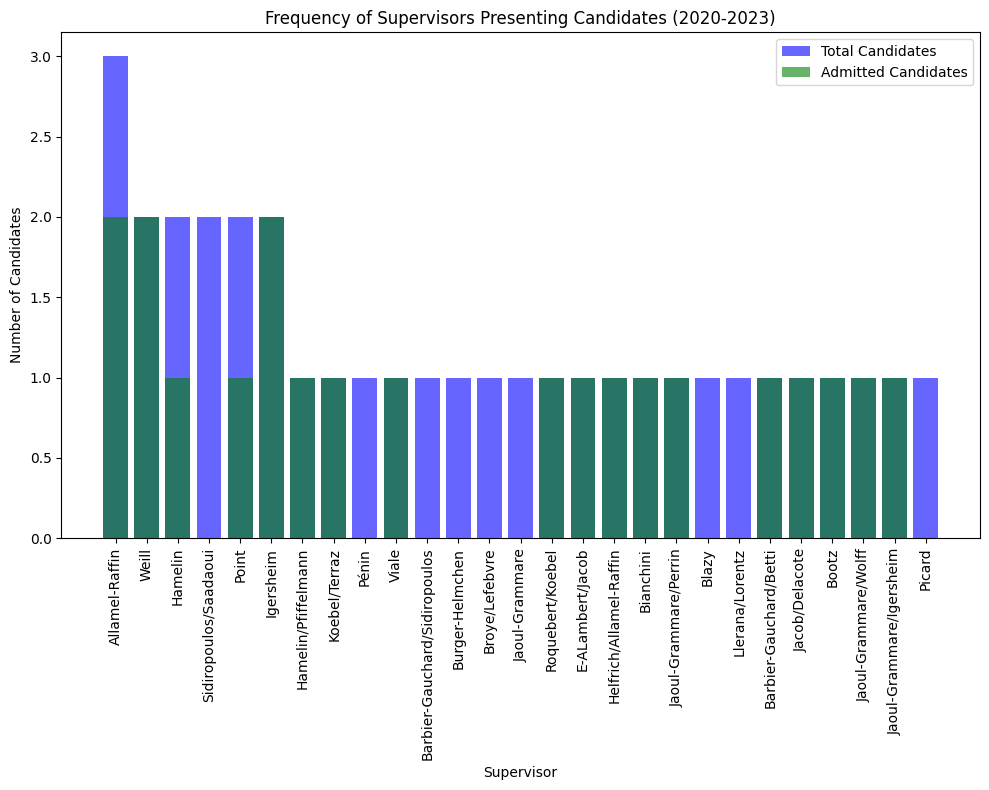

(                       Supervisor  Total_Candidates  Admitted_Candidates  \
 0                  Allamel-Raffin                 3                    2   
 1                           Weill                 2                    2   
 2                         Hamelin                 2                    1   
 3           Sidiropoulos/Saadaoui                 2                    0   
 4                           Point                 2                    1   
 5                       Igersheim                 2                    2   
 6             Hamelin/Pfiffelmann                 1                    1   
 7                   Koebel/Terraz                 1                    1   
 8                           Pénin                 1                    0   
 9                           Viale                 1                    1   
 10  Barbier-Gauchard/Sidiropoulos                 1                    0   
 11                Burger-Helmchen                 1                    0   

In [2]:
import matplotlib.pyplot as plt

# Filter the dataset for the years 2021-2023
filtered_data = data[data['Annee'].between(2021, 2023)]

# Step 1: Create a table showing the frequency of supervisors presenting candidates
supervisor_counts_filtered = filtered_data['Directeur'].value_counts().reset_index()
supervisor_counts_filtered.columns = ['Supervisor', 'Total_Candidates']

# Step 2: Split the data by admission status
admitted_counts_filtered = filtered_data[filtered_data['Admis'] == 1]['Directeur'].value_counts().reset_index()
admitted_counts_filtered.columns = ['Supervisor', 'Admitted_Candidates']

not_admitted_counts_filtered = filtered_data[filtered_data['Admis'] == 0]['Directeur'].value_counts().reset_index()
not_admitted_counts_filtered.columns = ['Supervisor', 'Not_Admitted_Candidates']

# Merge the tables
result_filtered = pd.merge(supervisor_counts_filtered, admitted_counts_filtered, on='Supervisor', how='left')
result_filtered = pd.merge(result_filtered, not_admitted_counts_filtered, on='Supervisor', how='left')
result_filtered = result_filtered.fillna(0)  # Replace NaN with 0
result_filtered['Admitted_Candidates'] = result_filtered['Admitted_Candidates'].astype(int)
result_filtered['Not_Admitted_Candidates'] = result_filtered['Not_Admitted_Candidates'].astype(int)

# Step 3: Visualize the data
fig, ax = plt.subplots(figsize=(10, 8))

# Plot total candidates
ax.bar(result_filtered['Supervisor'], result_filtered['Total_Candidates'], label='Total Candidates', color='b', alpha=0.6)

# Plot admitted candidates on top
ax.bar(result_filtered['Supervisor'], result_filtered['Admitted_Candidates'], label='Admitted Candidates', color='g', alpha=0.6)

# Adding labels and title
ax.set_xlabel('Supervisor')
ax.set_ylabel('Number of Candidates')
ax.set_title('Frequency of Supervisors Presenting Candidates (2020-2023)')
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()

# Display the filtered result table and the plot
result_filtered, plt.show()


Trend Analysis Over Time

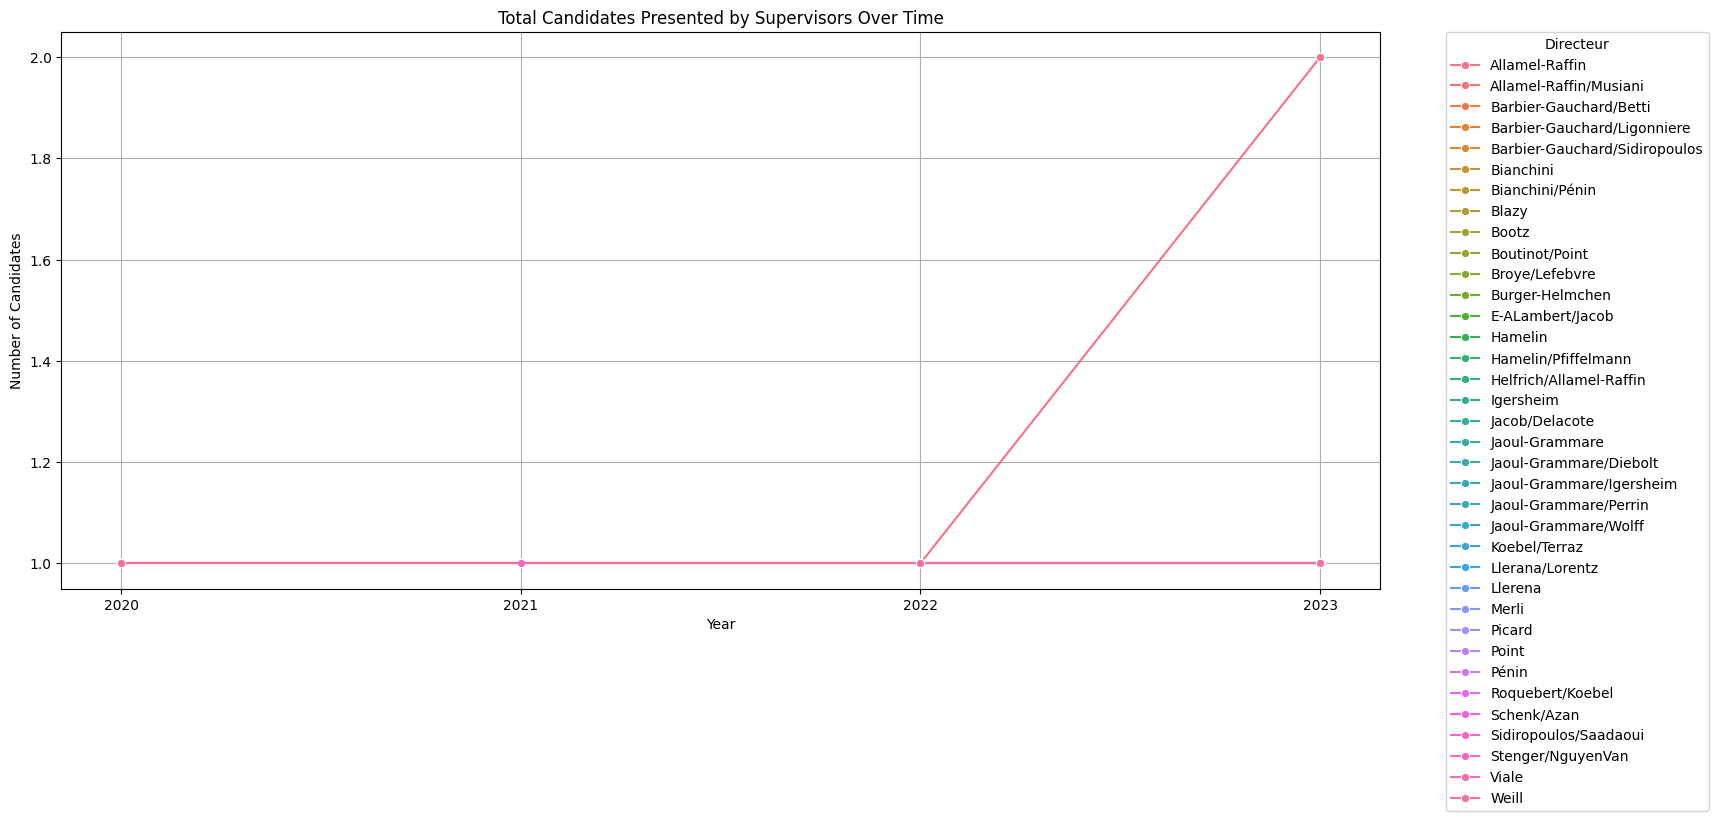

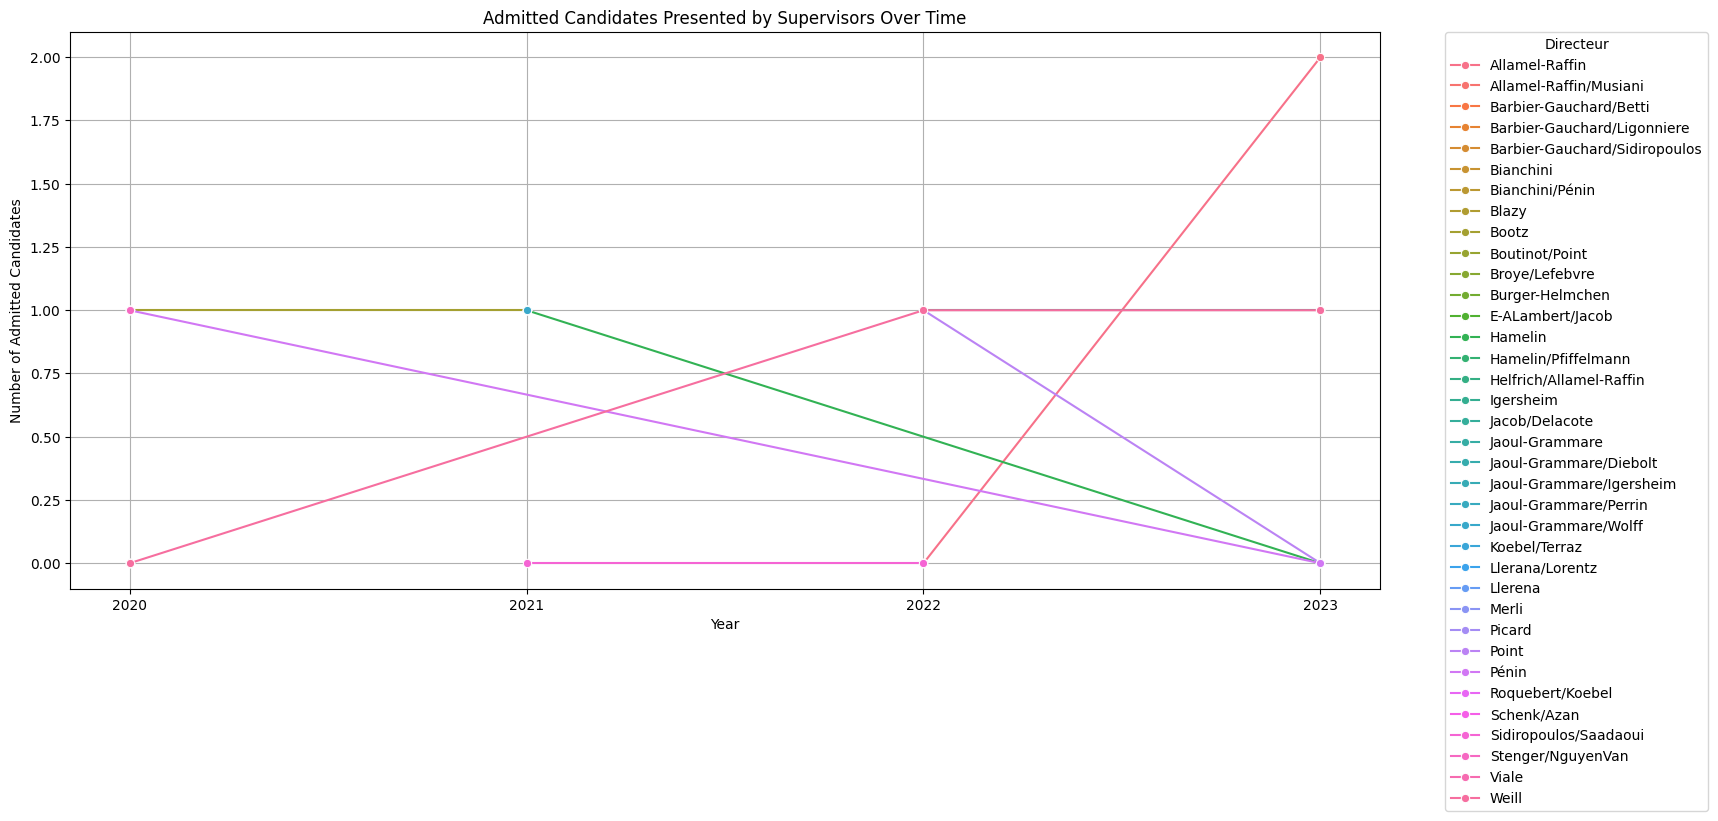

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_excel(file_path)

# Filter the dataset for the years 2020-2023
filtered_data = data[data['Annee'].between(2020, 2023)]

# Group by supervisor and year to get counts of total and admitted candidates
trend_data = filtered_data.groupby(['Directeur', 'Annee']).agg(
    Total_Candidates=('Nom', 'count'),
    Admitted_Candidates=('Admis', 'sum')
).reset_index()

# Plotting trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='Annee', y='Total_Candidates', hue='Directeur', marker='o')
plt.title('Total Candidates Presented by Supervisors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Candidates')
plt.xticks(trend_data['Annee'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Directeur', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='Annee', y='Admitted_Candidates', hue='Directeur', marker='o')
plt.title('Admitted Candidates Presented by Supervisors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Admitted Candidates')
plt.xticks(trend_data['Annee'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Directeur', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Success Rate Calculation

In [27]:
# Filter the dataset for the years 2020-2023
filtered_data = data[data['Annee'].between(2020, 2023)]

# Calculate success rate for each supervisor
result = filtered_data['Directeur'].value_counts().reset_index()
result.columns = ['Supervisor', 'Total_Candidates']
admitted_counts = data[data['Admis'] == 1]['Directeur'].value_counts().reset_index()
admitted_counts.columns = ['Supervisor', 'Admitted_Candidates']
result = pd.merge(result, admitted_counts, on='Supervisor', how='left').fillna(0)
result['Success_Rate'] = result['Admitted_Candidates'] / result['Total_Candidates']

# Display the success rate table
print(result[['Supervisor', 'Success_Rate']].sort_values(by='Supervisor', ascending=False))


                       Supervisor  Success_Rate
0                           Weill           2.0
15                          Viale           1.0
28              Stenger/NguyenVan           2.0
6           Sidiropoulos/Saadaoui           0.0
32                    Schenk/Azan           0.0
12               Roquebert/Koebel           1.0
2                           Pénin           2.0
5                           Point           0.5
35                         Picard           0.0
29                          Merli           2.0
30                        Llerena           2.0
21                Llerana/Lorentz           0.0
17                  Koebel/Terraz           1.0
24           Jaoul-Grammare/Wolff           1.0
26          Jaoul-Grammare/Perrin           1.0
25       Jaoul-Grammare/Igersheim           1.0
34         Jaoul-Grammare/Diebolt           0.0
10                 Jaoul-Grammare           0.0
23                 Jacob/Delacote           1.0
4                       Igersheim       

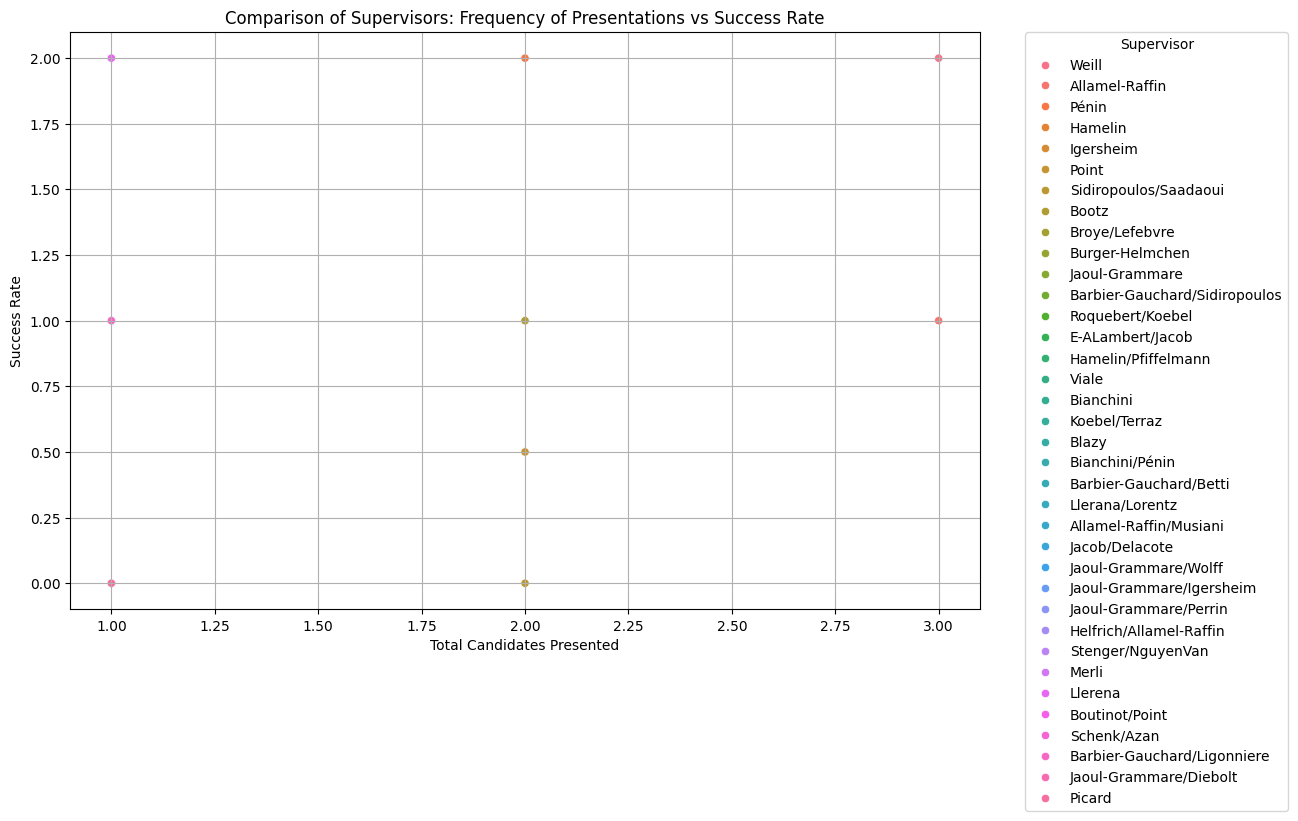

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=result, x='Total_Candidates', y='Success_Rate', hue='Supervisor')
plt.title('Comparison of Supervisors: Frequency of Presentations vs Success Rate')
plt.xlabel('Total Candidates Presented')
plt.ylabel('Success Rate')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Supervisor', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Cumulative Performance

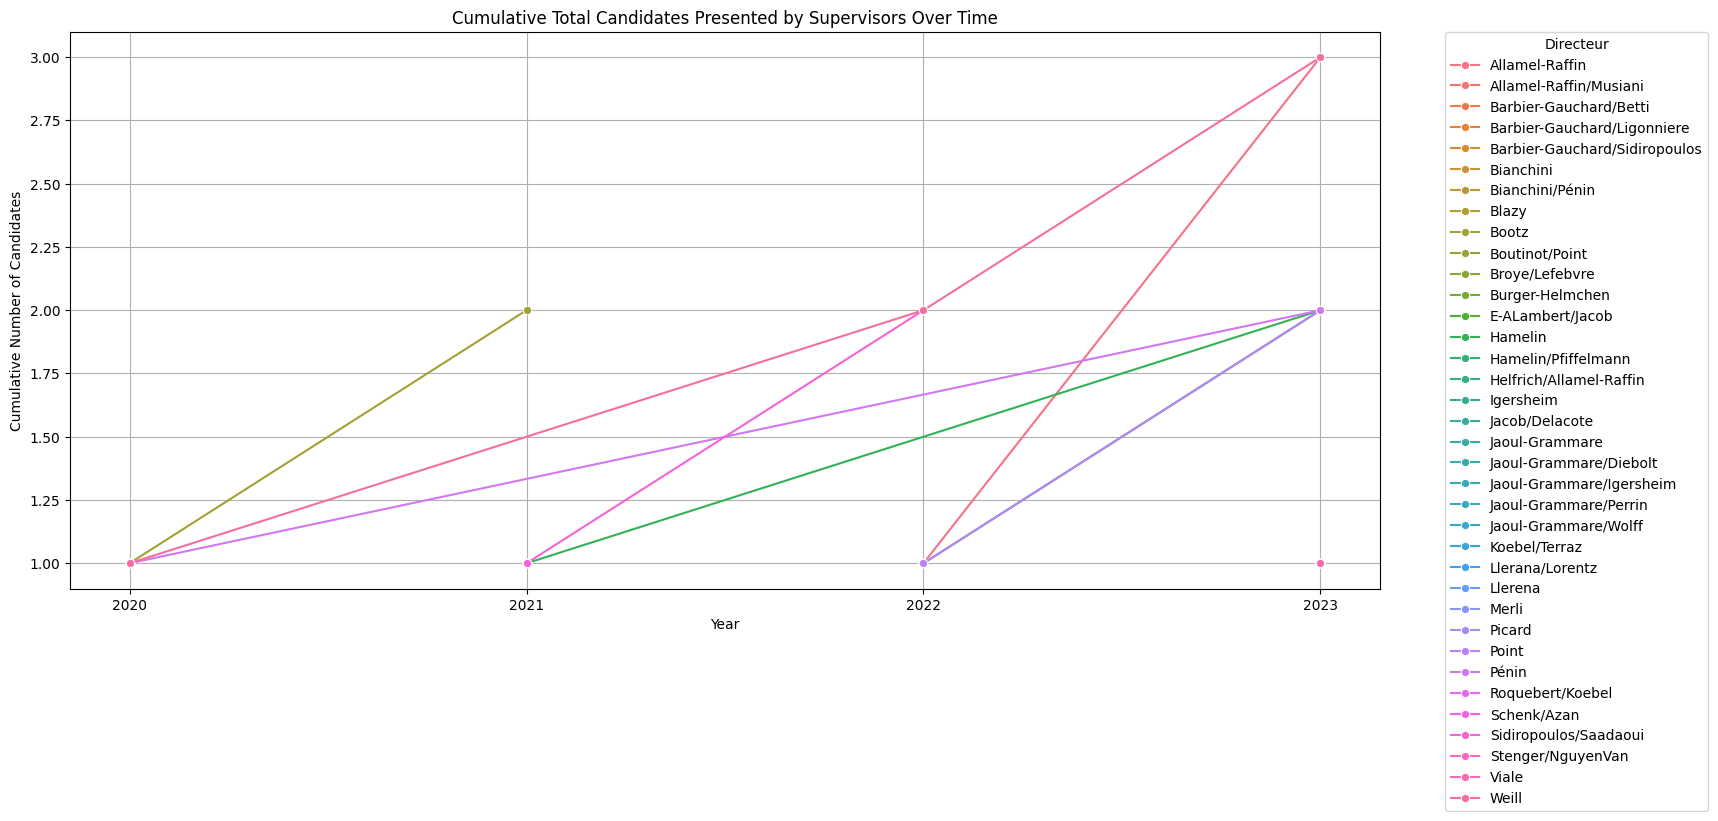

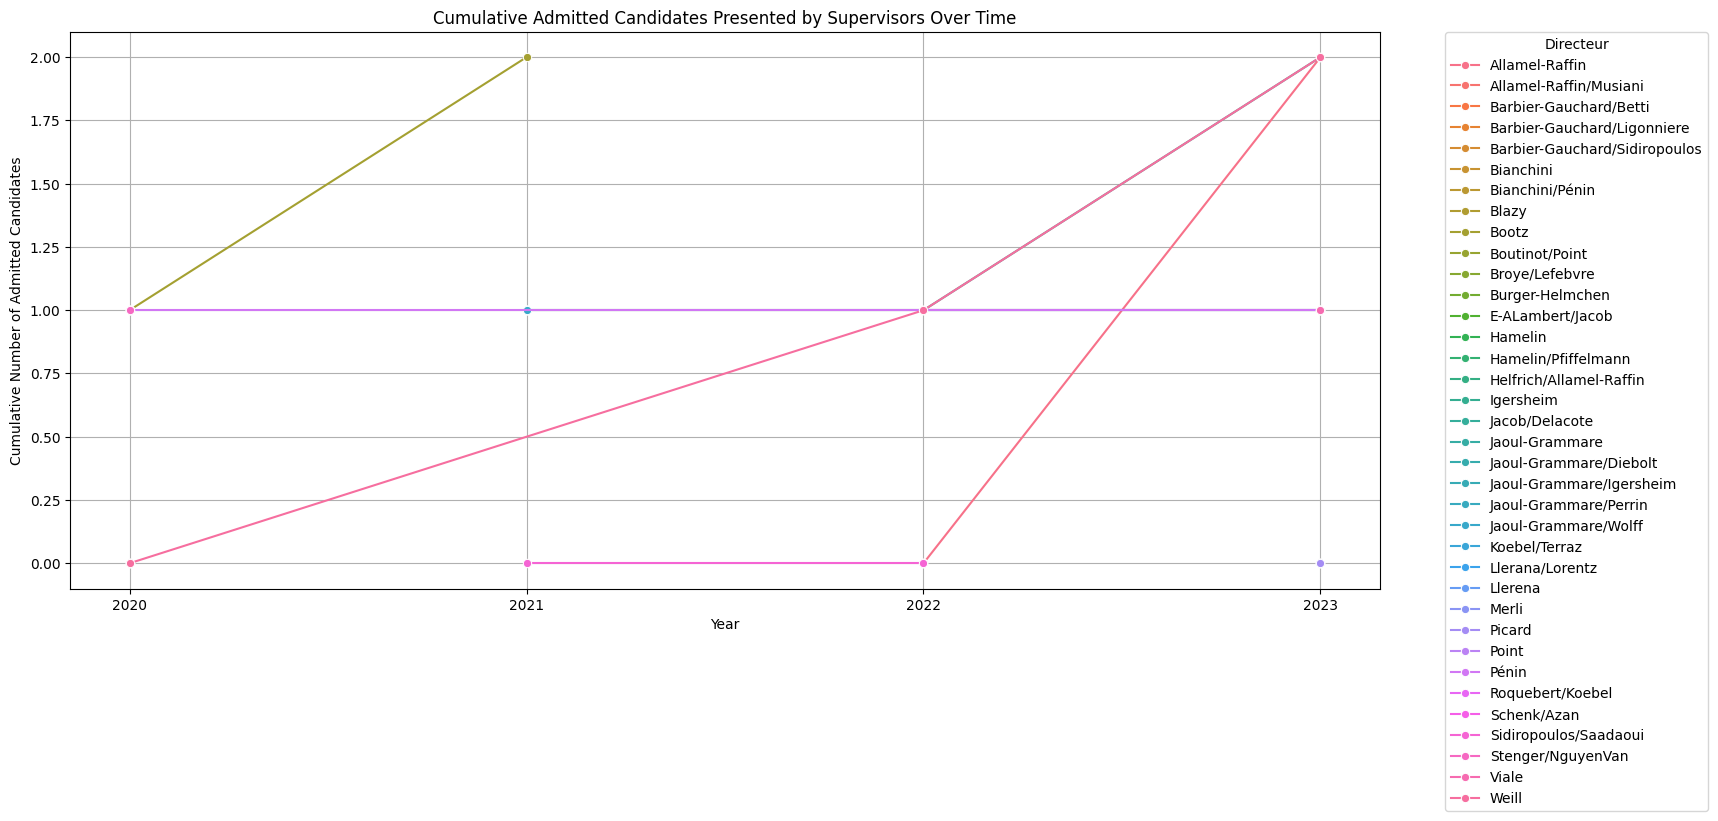

In [20]:
# Filter the dataset for the years 2020-2023
filtered_data = data[data['Annee'].between(2020, 2023)]

# Calculate cumulative performance
cumulative_data = filtered_data.groupby(['Directeur', 'Annee']).agg(
    Total_Candidates=('Nom', 'count'),
    Admitted_Candidates=('Admis', 'sum')
).groupby(level=0).cumsum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=cumulative_data, x='Annee', y='Total_Candidates', hue='Directeur', marker='o')
plt.title('Cumulative Total Candidates Presented by Supervisors Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Candidates')
plt.xticks(cumulative_data['Annee'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Directeur', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=cumulative_data, x='Annee', y='Admitted_Candidates', hue='Directeur', marker='o')
plt.title('Cumulative Admitted Candidates Presented by Supervisors Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Admitted Candidates')
plt.xticks(cumulative_data['Annee'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Directeur', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
